# Introduction to DEA Coastlines <img align="right" src="https://github.com/GeoscienceAustralia/dea-notebooks/raw/develop/Supplementary_data/dea_logo.jpg">

* **[Sign up to the DEA Sandbox](https://app.sandbox.dea.ga.gov.au/)** to run this notebook interactively from a browser
* **Compatibility:** Notebook currently compatible with both the `NCI` and `DEA Sandbox` environments
* **Products used:** [DEA Coastlines](https://knowledge.dea.ga.gov.au/data/product/dea-coastlines)

## Background
Australia has a highly dynamic coastline of over 30,000 km, with over 85% of its population living within 50 km of the coast. 
This coastline is subject to a wide range of pressures, including extreme weather and climate, sea level rise and human development. 
Understanding how the coastline responds to these pressures is crucial to managing this region, from social, environmental and economic perspectives. 

### What this product offers
[Digital Earth Australia Coastlines](https://maps.dea.ga.gov.au/story/DEACoastlines) is a continental dataset that includes annual shorelines and rates of coastal change along the entire Australian coastline from 1988 to the present. 

The product combines satellite data from Geoscience Australia's Digital Earth Australia program with tidal modelling to map the typical location of the coastline at mean sea level for each year. 
The product enables trends of coastal erosion and growth to be examined annually at both a local and continental scale, and for patterns of coastal change to be mapped historically and updated regularly as data continues to be acquired. 
This allows current rates of coastal change to be compared with that observed in previous years or decades. 

The ability to map shoreline positions for each year provides valuable insights into whether changes to our coastline are the result of particular events or actions, or a process of more gradual change over time. 
This information can enable scientists, managers and policy makers to assess impacts from the range of drivers impacting our coastlines and potentially assist planning and forecasting for future scenarios. 

### Applications
* Monitoring and mapping rates of coastal erosion along the Australian coastline 
* Prioritise and evaluate the impacts of local and regional coastal management based on historical coastline change 
* Modelling how coastlines respond to drivers of change, including extreme weather events, sea level rise or human development 
* Supporting geomorphological studies of how and why coastlines have changed across time 

### Publications

* Bishop-Taylor, R., Nanson, R., Sagar, S., Lymburner, L. (2021). Mapping Australia's dynamic coastline at mean sea level using three decades of Landsat imagery. *Remote Sensing of Environment*, 267, 112734. Available: https://doi.org/10.1016/j.rse.2021.112734
* Nanson, R., Bishop-Taylor, R., Sagar, S., Lymburner, L., (2022). Geomorphic insights into Australia's coastal change using a national dataset derived from the multi-decadal Landsat archive. Estuarine, Coastal and Shelf Science, 265, p.107712. Available: https://doi.org/10.1016/j.ecss.2021.107712
* Bishop-Taylor, R., Sagar, S., Lymburner, L., Alam, I., & Sixsmith, J. (2019). Sub-pixel waterline extraction: Characterising accuracy and sensitivity to indices and spectra. *Remote Sensing*, 11(24), 2984. Available: https://www.mdpi.com/2072-4292/11/24/2984

## Description

This notebook will demonstrate how to load data from the [Digital Earth Australia Coastlines](https://knowledge.dea.ga.gov.au/data/product/dea-coastlines) product using the Digital Earth Australia datacube. 
Topics covered include:

1. Loading DEA Coastlines annual shoreline data using the `get_coastlines` function.
2. Loading DEA Coastlines rates of change statistics data using the `get_coastlines` function.

<div class="alert alert-info">
    
**Note:** Visit the [DEA Coastlines product documentation](https://knowledge.dea.ga.gov.au/data/product/dea-coastlines) for detailed technical information including methods, quality, and data access.
To explore DEA Coastlines on an interactive map, [visit DEA Maps](https://maps.dea.ga.gov.au/story/DEACoastlines).
    
</div>

***


## Getting started

To run this analysis, run all the cells in the notebook, starting with the "Load packages" cell.

### Load packages

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

import sys
sys.path.insert(1, '../Tools/')
from dea_tools.coastal import get_coastlines


## Loading DEA Coastlines data 

### Annual shorelines

DEA Coastlines data can be loaded directly in a Python script or Jupyter Notebook using the DEA Coastlines Web Feature Service (WFS) and `geopandas`:


In [2]:
# Specify bounding box -27.14, -27.18; 153.024, 153.054
ymax, xmin = -27.14, 153.024
ymin, xmax = -27.18, 153.054

# Load DEA Coastlines annual shorelines data 
deacl_annualshorelines_gdf = get_coastlines(bbox=(xmin, ymin, xmax, ymax), 
                                      layer='shorelines_annual')

# Print example output
deacl_annualshorelines_gdf.head()

,id,year,certainty,tide_datum,id_primary,geometry
0,shorelines_annual.24399,2004,unstable data,0.0 m AMSL,QLD17,"MULTILINESTRING ((2050505.597 -3112947.042, 20..."
3,shorelines_annual.24402,2019,unstable data,0.0 m AMSL,QLD17,"LINESTRING (2050731.996 -3112940.855, 2050743...."
16,shorelines_annual.24416,2011,unstable data,0.0 m AMSL,QLD17,"MULTILINESTRING ((2050884.022 -3112930.138, 20..."
56,shorelines_annual.24459,2002,unstable data,0.0 m AMSL,QLD17,"MULTILINESTRING ((2051861.466 -3112125.594, 20..."
9,shorelines_annual.24409,2010,unstable data,0.0 m AMSL,QLD17,"MULTILINESTRING ((2050506.061 -3112944.248, 20..."


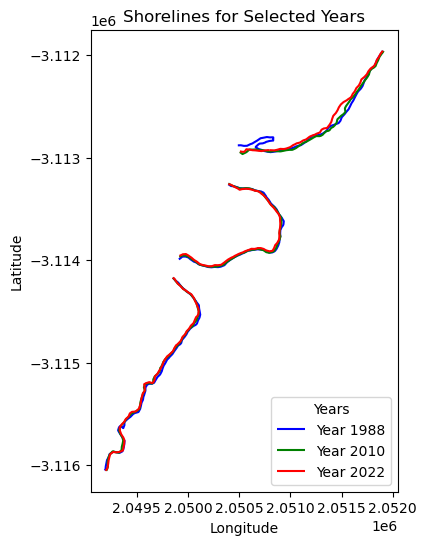

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Assuming deacl_annualshorelines_gdf is your GeoDataFrame
# Let's say you want to plot the data for the years 2004, 2010, and 2019.

# Filter the GeoDataFrame for specific years (e.g., 2004, 2010, 2019)
years_to_plot = [1988, 2010, 2022]
filtered_gdf = deacl_annualshorelines_gdf[deacl_annualshorelines_gdf['year'].isin(years_to_plot)]

# Define colors for each year
colors = {
    1988: 'blue',
    2010: 'green',
    2022: 'red'
}

# Plot the filtered data
fig, ax = plt.subplots(figsize=(8, 6))

# Plotting each year with a different color and adding labels for the legend
for year in years_to_plot:
    year_gdf = filtered_gdf[filtered_gdf['year'] == year]
    year_gdf.plot(ax=ax, color=colors[year], label=f'Year {year}')

# Add title and labels
ax.set_title('Shorelines for Selected Years')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')


# Add legend in the bottom-right corner
ax.legend(title="Years", loc='lower right', bbox_to_anchor=(1, 0))

# Show the plot
plt.show()



We can now plot the DEA Coastlines annual shoreline data using `geopandas`. 
Zoom in to **Bussleton** in Western Australia on the interactive map to view the shoreline data.

Annual shorelines represent the median or 'most representative' position of the shoreline at approximately mean sea level tide (0 m Above Mean Sea Level) for each year from 1988 onward.
Light-coloured lines (e.g. yellow) in the plot below represent recent shorelines, and dark-coloured lines represent older shorelines (e.g. 1988).

> **Note:** For more detail about DEA Coastlines annual shoreline data, refer to the official Geoscience Australia [DEA Coastlines product description](https://knowledge.dea.ga.gov.au/data/product/dea-coastlines).

In [4]:
# Plot on interactive map of DEA Coastlines data within our bounding box
deacl_annualshorelines_gdf.explore(column='year', cmap='inferno', categorical=True)

### Rates of change points

We can also load and plot the DEA Coastlines rates of change points.
These points provide robust rates of annual coastal change (in metres per year) for every 30 m along Australia's non-rocky (e.g. sandy and muddy) coastlines. 
These rates are calculated by linearly regressing annual shoreline positions against time, using the most recent shoreline as a baseline.

The DEA Coastlines rates of change points data provides many useful statistics that give insights into coastal change in Australia.

> **Note:** For a full description of each of these statistics, refer to the **Rates of change** section of the official Geoscience Australia [DEA Coastlines product description](https://knowledge.dea.ga.gov.au/data/product/dea-coastlines).

In [5]:
# Load DEA Coastlines rates of change points within our bounding box
deacl_ratesofchange_gdf = get_coastlines(
    bbox=(xmin, ymin, xmax, ymax), layer="rates_of_change"
)

# Filter points to statistically significant results only (p <= 0.01), 
# and points with good certainty (i.e. no poor quality flags)
deacl_ratesofchange_gdf = deacl_ratesofchange_gdf.query("sig_time <= 0.01")
deacl_ratesofchange_gdf = deacl_ratesofchange_gdf.query("certainty == 'good'")

# Print output
deacl_ratesofchange_gdf.head()

,id,uid,rate_time,sig_time,se_time,outl_time,dist_1988,dist_1989,dist_1990,dist_1991,...,angle_std,valid_obs,valid_span,sce,nsm,max_year,min_year,certainty,id_primary,geometry
32,rates_of_change.1322844,r7hv6k9w4w,0.39,0.000,0.10,None,-16.13,-21.41,-18.32,-17.82,...,15,36,36,34.27,16.13,2013,1992,good,QLD17,POINT (2049338.283 -3115664.686)
35,rates_of_change.1322847,r7hv6kcdrx,0.42,0.001,0.11,None,7.35,-21.77,-21.80,-20.64,...,16,36,36,36.66,-7.35,1988,1992,good,QLD17,POINT (2049373.045 -3115586.552)
38,rates_of_change.1322850,r7hv6kfn9e,-0.22,0.006,0.07,None,18.25,-1.23,0.38,0.57,...,12,36,36,21.91,-18.25,1988,2020,good,QLD17,POINT (2049426.789 -3115515.352)
39,rates_of_change.1322851,r7hv6m40h8,-0.34,0.002,0.10,None,23.41,2.35,4.62,5.59,...,8,36,36,26.41,-23.41,1988,2020,good,QLD17,POINT (2049443.500 -3115490.808)
40,rates_of_change.1322852,r7hv6m42fh,-0.32,0.001,0.08,None,18.24,3.69,6.26,7.26,...,8,36,36,25.69,-18.24,1997,2020,good,QLD17,POINT (2049469.865 -3115478.078)


In [6]:
import geopandas as gpd
# Save the GeoDataFrame as a GeoJSON file
deacl_ratesofchange_gdf.to_file("deacl_ratesofchange_gdf.geojson", driver="GeoJSON")


Negative rates of change (red points) on the map below indicate retreat (e.g. erosion), and positive values indicate growth (e.g. progradation) over time.
By default, rates of change are shown for good quality points with a statistically significant trend over time only.

In [7]:
# Add human-friendly label for plotting
deacl_ratesofchange_gdf["Coastal change"] = deacl_ratesofchange_gdf.apply(
    lambda x: f'<h4>This coastline has {"<b>retreated</b>" if x.rate_time < 0 else "<b>grown</b>"} '
    f"by</br><b>{x.rate_time:.2f} m (±{x.se_time * 1.96:.1f}) per year</b> since <b>1988</b></h4>",
    axis=1,
)

# Plot on interactive map
deacl_ratesofchange_gdf.explore(
    column="rate_time", cmap="RdBu", vmin=-3, vmax=3, tooltip="Coastal change"
)

### Exporting DEA Coastlines data as vector files
We can easily export the loaded data as spatial vector files (e.g. ESRI Shapefiles or GeoJSON) so that they can be analysed further in GIS software:

In [8]:
deacl_annualshorelines_gdf.to_file('deacoastlines_shorelines.shp')
deacl_ratesofchange_gdf.to_file('deacoastlines_statistics.shp')

/tmp/ipykernel_88/1542491713.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  deacl_ratesofchange_gdf.to_file('deacoastlines_statistics.shp')


## Next steps

### DEA Coastlines analysis tools

The [Coastal transect interactive app](../Interactive_apps/Coastal_transects.ipynb) allows you to analyse DEA Coastlines data directly in the DEA Sandbox without having to download data to your desktop or use a GIS. 

The interactive app can be used to draw transects on the map, and use these to track how a coastline has changed over recent decades.
Existing transects (i.e. in Esri Shapefile or GeoJSON format) can also be uploaded directly into the tool, and outputs can be exported as both figures and raw CSVs containing shoreline positions for each year since 1988.

![Transect example](../Supplementary_data/DEA_Coastlines/deacoastlines_transect.jpg)

### Coastline erosion notebook

The [Coastal erosion notebook](../Real_world_examples/Coastal_erosion.ipynb) in this repository provides a simplified example of the method used to extract DEA Coastlines annual shoreline data. 
Run this notebook if you would like to generate more customised coastlines for a specific location, time period, epoch (e.g. annual or biennial coastlines) or tidal range (e.g. the position of the coastline at low, mid  or high tide).

> **Note:** This notebook currently supports extracting coastline data only, not generating rates of change statistics like those included in the DEA Coastlines product.

---

## Additional information

**License:** The code in this notebook is licensed under the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0). 
Digital Earth Australia data is licensed under the [Creative Commons by Attribution 4.0](https://creativecommons.org/licenses/by/4.0/) license.

**Contact:** If you need assistance, please post a question on the [Open Data Cube Discord chat](https://discord.com/invite/4hhBQVas5U) or on the [GIS Stack Exchange](https://gis.stackexchange.com/questions/ask?tags=open-data-cube) using the `open-data-cube` tag (you can view previously asked questions [here](https://gis.stackexchange.com/questions/tagged/open-data-cube)).
If you would like to report an issue with this notebook, you can file one on [GitHub](https://github.com/GeoscienceAustralia/dea-notebooks).

**Last modified:** December 2023

## Tags
<!-- Browse all available tags on the DEA User Guide's [Tags Index](https://knowledge.dea.ga.gov.au/genindex/) -->